# Importing the necessary library to process the Audio files and extract the features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
import re
from IPython.display import Audio
from scipy.fftpack import fft, rfft
from scipy import stats
from librosa.core import piptrack
from librosa.feature import mfcc
from scipy.stats.mstats import gmean

# Appending the directories for the audio files in a list, to open them later.

In [2]:
audio_files = glob('..//audios_to_test//friends_voices//*.wav')

In [3]:
len(audio_files)

19

In [4]:
audio_files[1]

'..//audios_to_test//friends_voices\\f10 - Tedx.wav'

## Opening the audio files using librosa, the autputs are:
- audio = audio time series
- sampling_rate = sampling rate of audio

In [24]:
# TO open an audio file at a time and listen to it in the notebook
audio, sampling_rate = lr.load(audio_files[18])
Audio(audio, rate=sampling_rate)
print(audio_files[15])

..//audios_to_test//friends_voices\m5 -Ali1.wav


## To plot each audio file in the time domain

..//audios_to_test//friends_voices\f1 - Paula.wav


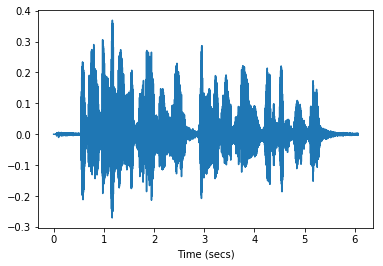

..//audios_to_test//friends_voices\f10 - Tedx.wav


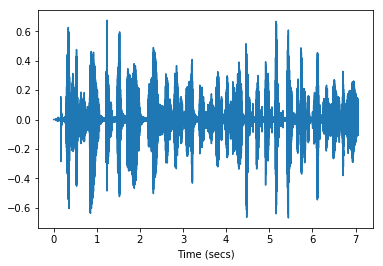

..//audios_to_test//friends_voices\f2 - Maria.wav


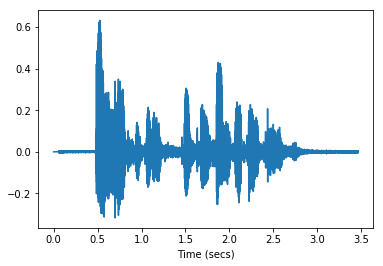

..//audios_to_test//friends_voices\f3 - Estefania.wav


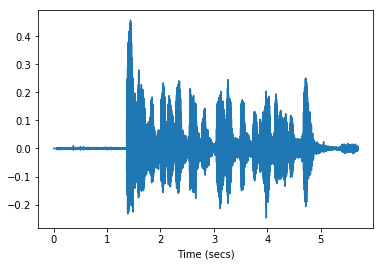

..//audios_to_test//friends_voices\f4 -Tedx.wav


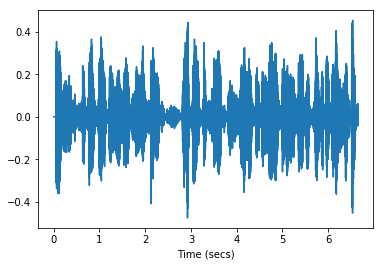

..//audios_to_test//friends_voices\f5 - Tedx.wav


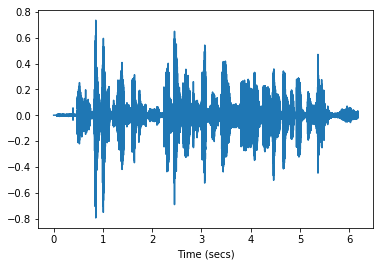

..//audios_to_test//friends_voices\f6 - E.wav


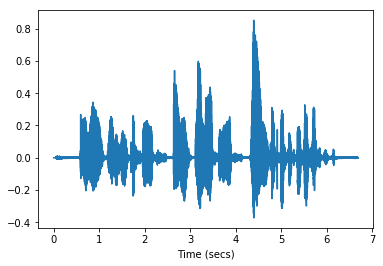

..//audios_to_test//friends_voices\f7-Tedx.wav


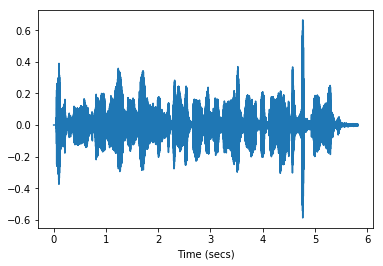

..//audios_to_test//friends_voices\f8 - Tedx.wav


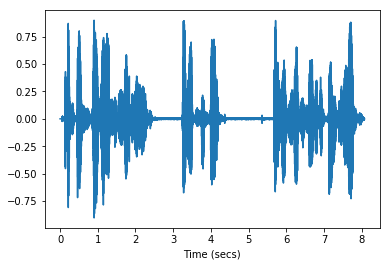

..//audios_to_test//friends_voices\f9 - Tedx.wav


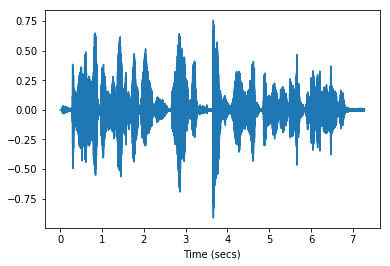

..//audios_to_test//friends_voices\m1 - Jaume.wav


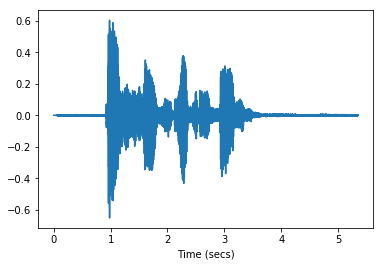

..//audios_to_test//friends_voices\m10 - Tedx.wav


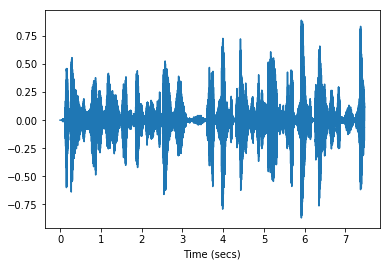

..//audios_to_test//friends_voices\m2 - Jaume.wav


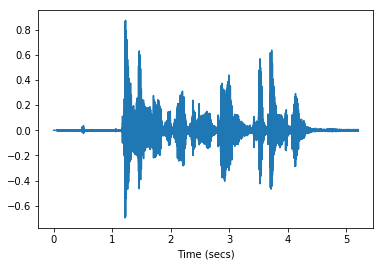

..//audios_to_test//friends_voices\m3 - Jordi.wav


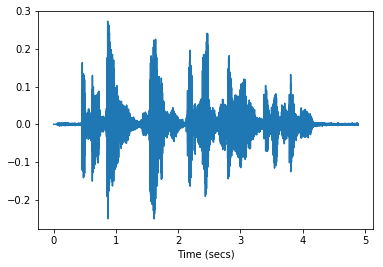

..//audios_to_test//friends_voices\m4 - Alex.wav


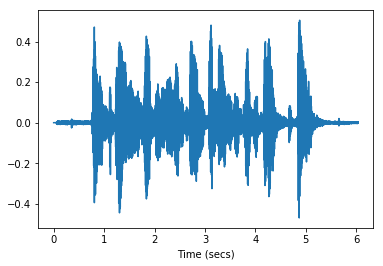

..//audios_to_test//friends_voices\m5 -Ali1.wav


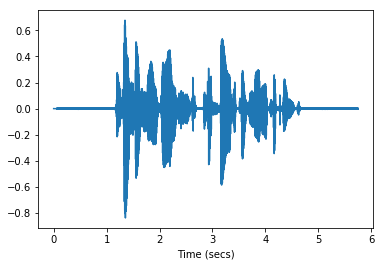

..//audios_to_test//friends_voices\m6 -Ali2.wav


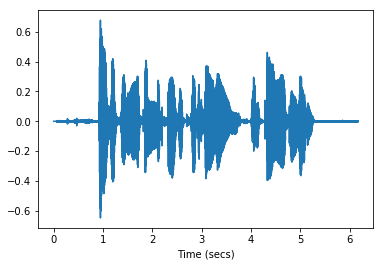

..//audios_to_test//friends_voices\m8 - Tedx.wav


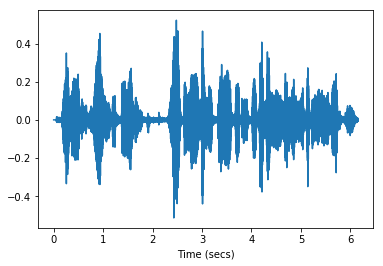

..//audios_to_test//friends_voices\m9 - Tedx.wav


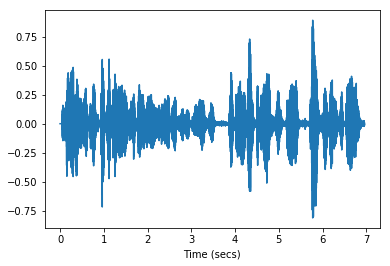

In [6]:
for file in range(0, len(audio_files), 1):
    audio, sampling_rate = lr.load(audio_files[file])
    time = np.arange(0, len(audio)) / sampling_rate
    print(audio_files[file])
    plt.plot(time, audio)
    plt.xlabel('Time (secs)')
    plt.show()

# Creating a function to extract the features needed out of an Audio file and then append the features into a dictionary

In [7]:
def feature_extractor(audio: np.ndarray, sampling_rate: int) -> dict:
    frequency_spectrum = np.abs(np.fft.rfft(audio))
    frequency = np.fft.rfftfreq(len(audio), d=1 / sampling_rate)
    frequency_spectrum = np.abs(frequency_spectrum)
    amplitude = frequency_spectrum / frequency_spectrum.sum()
    mean_frequency = (frequency * amplitude).sum()
    freq_standerd_deviation = np.sqrt(np.sum(amplitude * ((frequency - mean_frequency) ** 2)))
    amplitude_cumulative_sum = np.cumsum(amplitude)
    median_frequency = frequency[len(amplitude_cumulative_sum[amplitude_cumulative_sum <= 0.5]) + 1]
    mode_frequency = frequency[amplitude.argmax()]
    quartile_25 = frequency[len(amplitude_cumulative_sum[amplitude_cumulative_sum <= 0.25]) + 1]
    quartile_75 = frequency[len(amplitude_cumulative_sum[amplitude_cumulative_sum <= 0.75]) + 1]
    interquartile_range = quartile_75 - quartile_25
    deviation_from_mean = amplitude - amplitude.mean()
    amplitude_std = amplitude.std()
    skewness = ((deviation_from_mean ** 3).sum() / (len(frequency_spectrum) - 1)) / amplitude_std ** 3
    kurtosis = ((deviation_from_mean ** 4).sum() / (len(frequency_spectrum) - 1)) / amplitude_std ** 4
    centroid_frequency = lr.feature.spectral_centroid(y=audio, sr=sampling_rate)
    spectral_flatness = lr.feature.spectral_flatness(y=audio)
    pitches, magnitudes = piptrack(y=audio, sr=sampling_rate, fmax = 280)
    mfccs = mfcc(y=audio, sr=sampling_rate)
    root_mean_square = lr.feature.rms(audio)

    dictionary_of_features = {
        'Mean_freq': mean_frequency/1000,
        'Std': freq_standerd_deviation/1000,
        'Median_freq': median_frequency/1000,
        'Mode_freq': mode_frequency/1000,
        'First_quartile': quartile_25/1000,
        'Third_quartile': quartile_75/1000,
        'Interquantile_range': interquartile_range/1000,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Centroid_freq': np.mean(centroid_frequency)/1000,
        'Spectral_flatness_measure': np.mean(spectral_flatness),
        'Mean_fundamental_freq': (pitches[np.nonzero(pitches)].mean())/1000,
        'Min_fundamental_freq': (pitches[np.nonzero(pitches)].min())/1000,
        'Max_fundamental_freq': (pitches[np.nonzero(pitches)].max())/1000,
        'Mean_MFCCs' : mfccs.mean(),                            #Mel-frequency cepstral coefficients (MFCCs)
        'Std_MFCCs': mfccs.std(),
        'Root_mean_square': root_mean_square.mean()
    }

    return dictionary_of_features

# To open all the audio files, plot the frequency domain of ech file and apply the feature_extractor function to pull the features from the audio files and then append them into a list to use in creating a dataframe later.

### I added a condition to the loop to use the file name and append a new key: values pair in the dictionary, if the file starts with 'f' it appends 1 to a Gender key in the dictionary, if the file starts with anything else 'm', it appends 0 to the Gender key in the dictionary. 

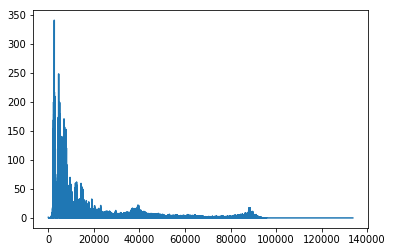

..//audios_to_test//friends_voices\f1 - Paula.wav


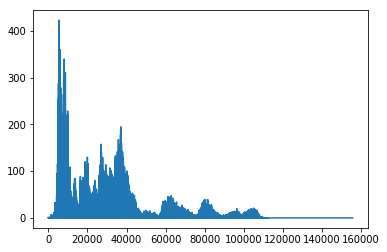

..//audios_to_test//friends_voices\f10 - Tedx.wav


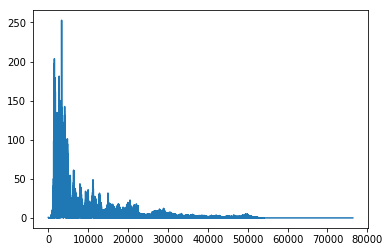

..//audios_to_test//friends_voices\f2 - Maria.wav


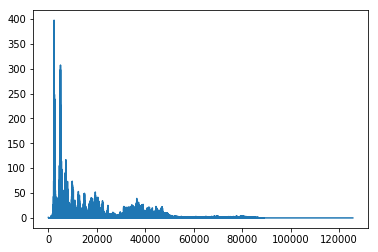

..//audios_to_test//friends_voices\f3 - Estefania.wav


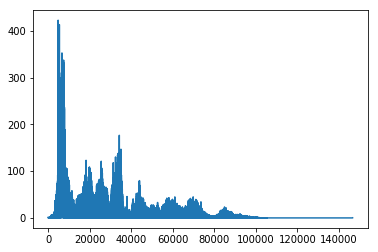

..//audios_to_test//friends_voices\f4 -Tedx.wav


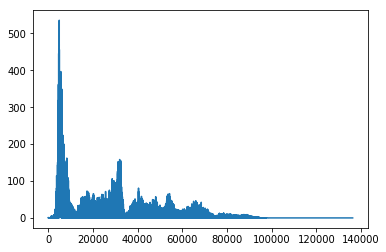

..//audios_to_test//friends_voices\f5 - Tedx.wav


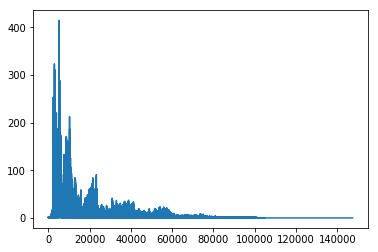

..//audios_to_test//friends_voices\f6 - E.wav


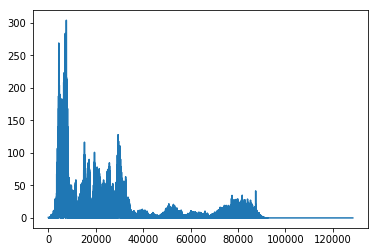

..//audios_to_test//friends_voices\f7-Tedx.wav


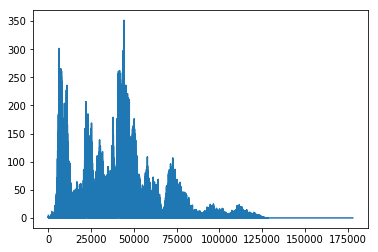

..//audios_to_test//friends_voices\f8 - Tedx.wav


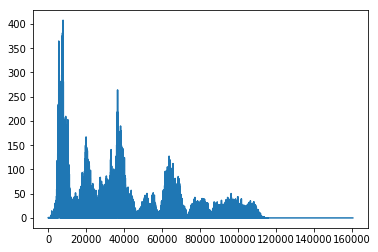

..//audios_to_test//friends_voices\f9 - Tedx.wav


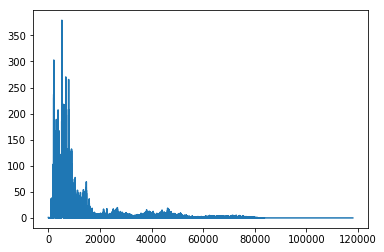

..//audios_to_test//friends_voices\m1 - Jaume.wav


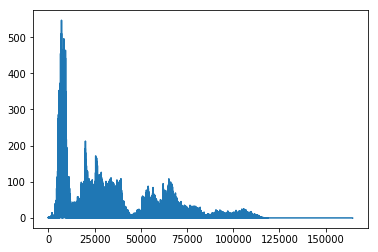

..//audios_to_test//friends_voices\m10 - Tedx.wav


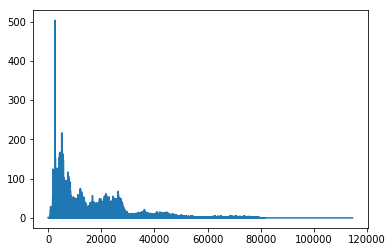

..//audios_to_test//friends_voices\m2 - Jaume.wav


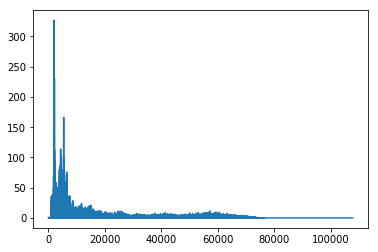

..//audios_to_test//friends_voices\m3 - Jordi.wav


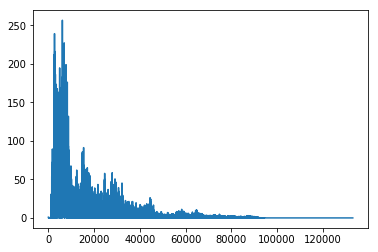

..//audios_to_test//friends_voices\m4 - Alex.wav


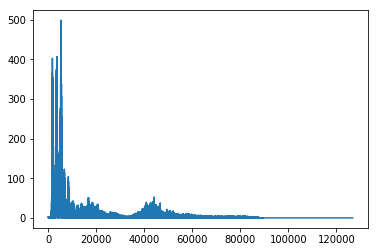

..//audios_to_test//friends_voices\m5 -Ali1.wav


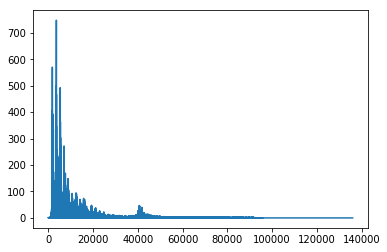

..//audios_to_test//friends_voices\m6 -Ali2.wav


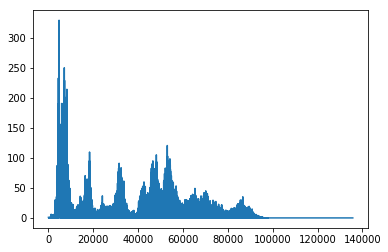

..//audios_to_test//friends_voices\m8 - Tedx.wav


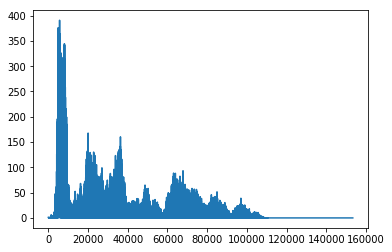

..//audios_to_test//friends_voices\m9 - Tedx.wav


In [8]:
list_of_dict = []
for file in range(0, len(audio_files), 1):
    audio, sampling_rate = lr.load(audio_files[file])
    frequencies = rfft(audio)
    plt.plot(abs(frequencies))
    plt.show()
    print(audio_files[file])
    dictionary_of_features = feature_extractor(audio, sampling_rate)
    if audio_files[file].startswith('..//audios_to_test//friends_voices\\f'):
        dictionary_of_features['Gender'] = 1
    elif  audio_files[file].startswith('..//audios_to_test//friends_voices\\m'):
        dictionary_of_features['Gender'] = 0
    list_of_dict.append(dictionary_of_features)

## Printing the list of dictionaries to make sure that all the dictionaries are in it.

In [9]:
#list_of_dict

## Creating a dataframe for the features extracted from the audio files

In [10]:
friends_voices = pd.DataFrame(list_of_dict)

In [11]:
friends_voices

,Centroid_freq,First_quartile,Gender,Interquantile_range,Kurtosis,Max_fundamental_freq,Mean_MFCCs,Mean_freq,Mean_fundamental_freq,Median_freq,Min_fundamental_freq,Mode_freq,Root_mean_square,Skewness,Spectral_flatness_measure,Std,Std_MFCCs,Third_quartile
0,1.520965,0.420445,1,1.639717,63.349399,0.284956,-25.048574,1.620699,0.208515,0.756767,0.146398,0.370466,0.037011,6.591630,0.004254,1.882085,84.907509,2.060162
1,2.378998,0.667675,1,2.134945,25.843574,0.285308,-21.781908,2.227307,0.244304,1.937987,0.148314,0.385132,0.069124,4.027409,0.003572,1.773049,65.220032,2.802620
2,1.567703,0.468019,1,1.687292,51.761446,0.284977,-23.402885,1.549518,0.218778,0.893306,0.145376,0.477835,0.041074,5.875527,0.007229,1.571381,84.701729,2.155311
3,1.791400,0.499756,1,2.422450,127.931409,0.284925,-25.624180,1.789895,0.215905,1.199030,0.146033,0.205834,0.030826,8.849543,0.004707,1.593467,87.612541,2.922207
4,2.297588,0.608308,1,2.684702,40.424638,0.285190,-20.807325,2.252852,0.238848,1.894668,0.151985,0.357139,0.067941,5.071221,0.003738,1.737463,66.331200,3.293010
5,2.373673,0.600883,1,2.941154,53.041329,0.285247,-21.977844,2.330409,0.231276,2.062157,0.151742,0.397191,0.065752,5.769905,0.004112,1.786794,67.396477,3.542037
6,1.775214,0.407461,1,1.698477,45.973420,0.285232,-23.159203,1.476606,0.216630,0.836005,0.146255,0.395648,0.048436,5.504402,0.004063,1.445454,82.047859,2.105938
7,2.526411,0.661318,1,2.050584,30.887376,0.283397,-20.924967,2.294143,0.230013,1.722930,0.163816,0.649125,0.059817,4.450440,0.004340,2.013098,69.011154,2.711902
8,2.652462,1.430420,1,1.872074,12.744667,0.285190,-21.720949,2.603572,0.228511,2.576441,0.146475,2.731218,0.066640,2.757430,0.003763,1.567549,72.055557,3.302494
9,2.733101,1.051747,1,3.359022,26.037783,0.285296,-22.102983,2.827912,0.232104,2.465024,0.145694,0.529721,0.069914,3.844742,0.003870,2.047822,65.808075,4.410770


In [12]:
friends_voices.to_csv('..//datasets//friends_voices.csv', index=False)